# Neural Network Regression with Tensorflow

In [27]:
!nvidia-smi

Mon Jun 20 09:41:37 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.96       Driver Version: 512.96       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   55C    P8     5W /  N/A |   4446MiB /  6144MiB |      7%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [28]:
import tensorflow as tf
tf.__version__

'2.9.1'

What we'll cover:
* Architecture of a neural network regression model
* Input shapes and output shapes a regression model (features and labels)
* Creating custom data to view and fit
* Steps in modelling
* Creating a model, compiling a model, fitting a model, evaluating a model
* Different evaluation methods
* Saving and loading models

## Regression inputs and outputs

`Inputs` -> `Machine Learning Model` -> `Outputs`

We're essentially trying to figure out the relationship between inputs and outputs

## Anatomy of Neural Networks

`Input` -> `Input Layer` -> `Hidden Layer(s)` -> `Output Layer`-> `Output`

|Hyperparameter|Typical Value|
|--------------|-------------|
|Input Layer Shape|Same shape as number of features (eg 3 for # bedrooms, # car spaces in housing price prediction)|
|Hidden Layer(s)|Problem specific, minimum = 1, maximum = $\infty$|
|Neurons per hidden layer|Problem specific; generally 10 to 100|
|Output layer shape|Same shape as desired prediction shape (eg 1 for house price)|
|Hidden activation|Using ReLU (rectified linear unit)|
|Output activation|None, ReLU, logistic/tanh|
|Loss function|MSE(mean square error) or MAE (mean absolute error)/Huber (combination of MAE/MSE) if outliers|
|Optimizer|SGD (stochastic gradient descent), Adam|

#### Model specimen
model = tf.keras.Sequential(<br>
    [<br>
        tf.keras.Input(shape = (3,)),<br>
        tf.keras.layers.Dense(100, activation = "relu"),<br>
        tf.keras.layers.Dense(100, activation = "relu"),<br>
        tf.keras.layers.Dense(100, activation = "relu"),<br>
        tf.keras.layers.Dense(1, activation = None)<br>
    ]<br>
)<br>
#### Compiling the model
model.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(lr = 1e-3), metrics = ["mae"])
#### Fit the model
model.fit(X_train, y_train, epochs = 100)

## Creating Sample Regression Data

In [29]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

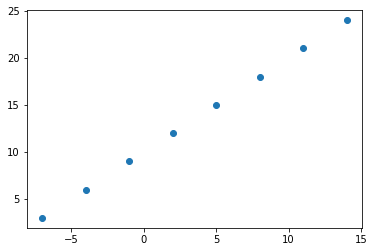

In [30]:
# Create the features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create the labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualise it
plt.scatter(X,y);

## Input and Output Shapes

In [31]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom","bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [32]:
X = tf.constant(X)
y = tf.constant(y)

X = X[..., tf.newaxis]

X.shape, y.shape

(TensorShape([8, 1]), TensorShape([8]))

## Steps in Modelling with Tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)

In [33]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model  = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae, # Mean absolute error
    optimizer = tf.keras.optimizers.SGD(), # Stochastic Gradient Descent
    metrics = ["mae"]
)
# 3. Fit the model
model.fit(X, y, epochs = 5)

# Alternatively we can also do
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1, shape = (1,)))
# ...

Epoch 1/5
1/1 [==============================] - 0s 215ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [34]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [35]:
# Try and make a prediction using our model
y_pred = model.predict([[17.0]])

1/1 [==============================] - 0s 45ms/step


In [36]:
y_pred + 11 # Add the mean absolute error

array([[23.71602]], dtype=float32)

We're still off! The model should have predicted 27 but we can always improve.

## Improving our Model

We can improve the model, by altering the steps we took to create a model

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the loss function, optimization function or perhaps the **learning rate** of the optimization function
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [37]:
# Increase the epochs
# 1. Create a model using the Sequential API
model  = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae, # Mean absolute error
    optimizer = tf.keras.optimizers.SGD(), # Stochastic Gradient Descent
    metrics = ["mae"]
)
# 3. Fit the model
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 251ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s

In [38]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [39]:
# Lets see if our model's prediction has improved
model.predict([[17.0]])

1/1 [==============================] - 0s 45ms/step


array([[29.739855]], dtype=float32)

And yes! Its pretty close to 27!

In [40]:
# Lets test by adding in a hidden layer

# 1. Create the model 
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100, activation = "relu"),
        tf.keras.layers.Dense(1, activation = None)
    ]
)

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

# 3. Fit the model
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 245ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - 

In [41]:
# Lets try to see if its performance has improved.
model.predict([[17.0]])

1/1 [==============================] - 0s 50ms/step


array([[31.22314]], dtype=float32)

Ohkay.....this seems a bit off...but we're getting there. This might be overfitting to the training data.

In [42]:
# Lets try the Adam optimizer this time

# 1. Create the model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100, activation = "relu"),
        tf.keras.layers.Dense(1, activation = None)
    ]
)

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics = ["mae"]
)

# 3. Fit the model
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 269ms/step - loss: 12.7339 - mae: 12.7339
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 12.6498 - mae: 12.6498
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 12.5666 - mae: 12.5666
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 12.4824 - mae: 12.4824
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 12.3987 - mae: 12.3987
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 12.3151 - mae: 12.3151
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 12.2313 - mae: 12.2313
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 12.1475 - mae: 12.1475
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 12.0636 - mae: 12.0636
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 11.9797 - mae: 11.9797
Epoch 11/100
1/1 [==============================] - 0s 

In [43]:
model.predict([[17.0]])

1/1 [==============================] - 0s 49ms/step


array([[26.75023]], dtype=float32)

Yeah this is worse.

In [44]:
# Lets try to reduce the number of neurons in the hidden layer. Maybe it will end up improving things for us?

# 1. Create the model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(50, activation = "relu"),
        tf.keras.layers.Dense(1, activation = None)
    ]
)

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2),
    metrics = ["mae"]
)

# 3. Fit the model
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 270ms/step - loss: 12.4190 - mae: 12.4190
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.8429 - mae: 11.8429
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.2581 - mae: 11.2581
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.6721 - mae: 10.6721
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0804 - mae: 10.0804
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 9.5489 - mae: 9.5489
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 9.1225 - mae: 9.1225
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 8.6844 - mae: 8.6844
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 8.2325 - mae: 8.2325
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 7.7671 - mae: 7.7671
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - l

In [45]:
model.predict([[17.0]])

1/1 [==============================] - 0s 50ms/step


array([[28.953987]], dtype=float32)

This is our best model so far! We're sitting almost at 27!

## Improving a model - Methods

Common ways to improve a deep model:
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate
* Fitting on more data
* Fitting for longer

## Evaluating a model
In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it .....
```

When it comes to evaluation....there are 3 words you should memorize:
>"Visualize, visualize, visualize"

Its a good idea to visualize:
* The data - what data are we working with? What does it look like
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [46]:
# Make a bigger dataset

X = tf.cast(tf.range(-100, 100, 4), dtype=tf.float32)

# Make labels for the dataset
y = X + 10 + tf.random.uniform(X.shape, -10, 10)

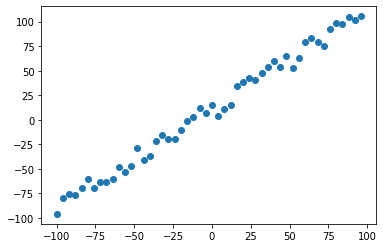

In [47]:
plt.scatter(X,y)

### The 3 sets ...

* **Training set** - the model learns from this data, which is typically 70-80%
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available
* **Test set** - the model gets evaluated on this data to test what it has learnt, this set is typically 10-15% of the total data available

Analogy<br>
Course materials -> Practice exam  -> Final exam<br>
[train_set]&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[validation_set]&nbsp;&nbsp;&nbsp;[test_set]

In [48]:
# The three sets...
random_permutation = np.random.permutation(X.numpy().shape[0])
test_set_idx, val_set_idx, train_set_idx = random_permutation[:len(random_permutation)//10], random_permutation[len(random_permutation)//10:int(0.3*len(random_permutation))], random_permutation[int(0.3*len(random_permutation)):]

X_train, X_val, X_test = tf.convert_to_tensor(X.numpy()[train_set_idx])[..., tf.newaxis], tf.convert_to_tensor(X.numpy()[val_set_idx])[..., tf.newaxis], tf.convert_to_tensor(X.numpy()[test_set_idx])[..., tf.newaxis]
y_train, y_val, y_test = tf.convert_to_tensor(y.numpy()[train_set_idx]), tf.convert_to_tensor(y.numpy()[val_set_idx]), tf.convert_to_tensor(y.numpy()[test_set_idx])

### Visualising the data

Now we've got our data in training and test sets....lets visualise it again!

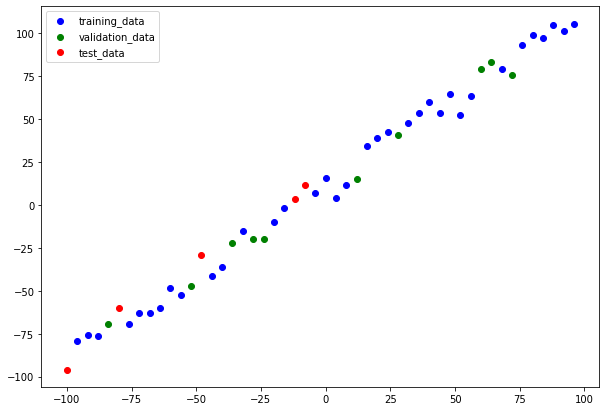

In [49]:
plt.figure(figsize = (10,7))
# Plot the training data in blue
plt.scatter(X_train, y_train, c="b", label = "training_data")
# Plot the val data in green
plt.scatter(X_val, y_val, c = "g", label = "validation_data")
# Plot the test data in red
plt.scatter(X_test, y_test, c = "r", label = "test_data")
# Show a legend
plt.legend();

In [50]:
# 1. Create a model (specified to your problems)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation = None, name = "Dense_Layer")
])

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

In [51]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

This happens because input shape to the model is not defined. Lets create a model with a defined input shape

In [ ]:
# 1. Create a model (specified to your problems)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape = (1,), activation = None, name = "Dense_Layer")
])

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_Layer (Dense)         (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Presto! We have our model instantiated

* Total params - total number of parameters in the model
* Trainable params - these are the parameters (patterns) the model can update as it trains
* Non-trainable params - these parameteres aren't updated during training (this is typical when you have parameters from other models during transfer learning)

In [ ]:
from tensorflow.keras.utils import plot_model
import pydot_ng as pydot
import graphviz
pydot.find_graphviz()

In [ ]:
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [ ]:
# Lets fit our model to the training data
model.fit(X_train,y_train, validation_data=(X_val, y_val), epochs = 100, verbose = 2)

Epoch 1/100
2/2 - 0s - loss: 21.0919 - mae: 21.0919 - val_loss: 7.6659 - val_mae: 7.6659 - 119ms/epoch - 59ms/step
Epoch 2/100
2/2 - 0s - loss: 10.6932 - mae: 10.6932 - val_loss: 11.0732 - val_mae: 11.0732 - 82ms/epoch - 41ms/step
Epoch 3/100
2/2 - 0s - loss: 10.4076 - mae: 10.4076 - val_loss: 19.2308 - val_mae: 19.2308 - 60ms/epoch - 30ms/step
Epoch 4/100
2/2 - 0s - loss: 24.7479 - mae: 24.7479 - val_loss: 7.0820 - val_mae: 7.0820 - 59ms/epoch - 29ms/step
Epoch 5/100
2/2 - 0s - loss: 9.4267 - mae: 9.4267 - val_loss: 7.6226 - val_mae: 7.6226 - 60ms/epoch - 30ms/step
Epoch 6/100
2/2 - 0s - loss: 10.8548 - mae: 10.8548 - val_loss: 10.0043 - val_mae: 10.0043 - 61ms/epoch - 31ms/step
Epoch 7/100
2/2 - 0s - loss: 10.7805 - mae: 10.7805 - val_loss: 10.1858 - val_mae: 10.1858 - 54ms/epoch - 27ms/step
Epoch 8/100
2/2 - 0s - loss: 9.6701 - mae: 9.6701 - val_loss: 7.5864 - val_mae: 7.5864 - 60ms/epoch - 30ms/step
Epoch 9/100
2/2 - 0s - loss: 9.8537 - mae: 9.8537 - val_loss: 36.9268 - val_mae: 36

In [ ]:
# Lets create a model that builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model (specified to your problems)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape = (1,), activation = "relu", name = "hidden_layer"),
    tf.keras.layers.Dense(1, activation = None, name = "output_layer")
], name = "model_1")

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Lets fit our model to the training data
model.fit(X_train,y_train, validation_data=(X_val, y_val), epochs = 100, verbose = 2)

Epoch 1/100
2/2 - 0s - loss: 118.8339 - mae: 118.8339 - val_loss: 64.7255 - val_mae: 64.7255 - 377ms/epoch - 188ms/step
Epoch 2/100
2/2 - 0s - loss: 72.4998 - mae: 72.4998 - val_loss: 22.4055 - val_mae: 22.4055 - 40ms/epoch - 20ms/step
Epoch 3/100
2/2 - 0s - loss: 26.6928 - mae: 26.6928 - val_loss: 14.2413 - val_mae: 14.2413 - 40ms/epoch - 20ms/step
Epoch 4/100
2/2 - 0s - loss: 17.9859 - mae: 17.9859 - val_loss: 10.7150 - val_mae: 10.7150 - 70ms/epoch - 35ms/step
Epoch 5/100
2/2 - 0s - loss: 11.2340 - mae: 11.2340 - val_loss: 12.2345 - val_mae: 12.2345 - 55ms/epoch - 27ms/step
Epoch 6/100
2/2 - 0s - loss: 12.3554 - mae: 12.3554 - val_loss: 19.0321 - val_mae: 19.0321 - 36ms/epoch - 18ms/step
Epoch 7/100
2/2 - 0s - loss: 22.3680 - mae: 22.3680 - val_loss: 18.6058 - val_mae: 18.6058 - 38ms/epoch - 19ms/step
Epoch 8/100
2/2 - 0s - loss: 20.4914 - mae: 20.4914 - val_loss: 22.5020 - val_mae: 22.5020 - 49ms/epoch - 24ms/step
Epoch 9/100
2/2 - 0s - loss: 23.4925 - mae: 23.4925 - val_loss: 20.4

## Visualising our Model's predictions
To visualise predictions its a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test or y_true versus y_pred (ground truth vs your model's predictions)

In [53]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 33ms/step


array([[-53.24751  ],
       [ -4.239314 ],
       [-66.8609   ],
       [-31.466093 ],
       [ -6.9619923]], dtype=float32)

In [54]:
y_test

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([-60.212627 ,  11.738316 , -95.907974 , -29.188904 ,   3.1377392],
      dtype=float32)>

**Note**: If you feel like you're going to reuse some kind of functionality in the future its a good idea to turn it into a function

In [55]:
# Lets create a plotting function
def plot_predictions(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions = y_pred
):
    """
    Plots training data, test data and compares predictions to ground truth
    """
    plt.figure(figsize=(10,7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c ="b", label = "Training data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c = "g", label = "Testing data")
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c = "r", label = "Predictions")
    # Show the legend
    plt.legend();

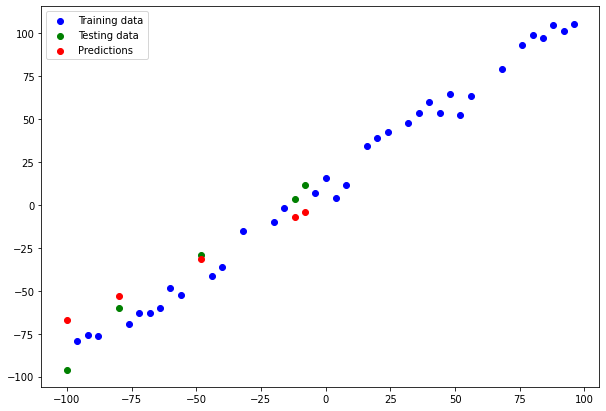

In [56]:
plot_predictions()

## Evaluating our Model's Predictions with Regression Evaluation Metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance. Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of the model's predictions"
* MSE - mean squared error, "square the average errors"

|Metric Name|Metric Formula|Tensorflow Code|When to use|
|-----------|--------------|---------------|-----------|
|Mean absolute error (MAE)|$MAE=\frac{\sum_{i=1}^nabs(y_i - x_i)}{n}$|tf.keras.losses.MAE() or tf.metrics.mean_absolute_error()|As a great starter metric for any regression problem|
|Mean square error (MSE)|$MSE=\frac{\sum_{i=1}^n(y_i - x_i)^2}{n}$|tf.keras.losses.MSE() or tf.metrics.mean_square_error()|When larger errors are more significant than smaller errors|
|Huber|$L_g(y, f(x)) = \frac{(y-f(x))^2}{2} ? abs(y-f(x)) \le \delta; \delta abs(y-f(x)) - \frac{\delta^2}{2} otherwise $|tf.keras.losses.Huber()|Combination of MSE and MAE. Less sensitive to outliers than MSE|

In [57]:
model.evaluate(X_val, y_val)

1/1 [==============================] - 0s 33ms/step - loss: 16.1216 - mae: 16.1216


[16.121566772460938, 16.121566772460938]

In [61]:
# Calculate the mean absolute error

y_pred, y_test
mae = tf.keras.losses.MAE(y_test, tf.squeeze(tf.constant(y_pred)))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=12.873349>

In [66]:
# Calculate the mean squared error
mse = tf.keras.losses.MSE(y_test, tf.squeeze(tf.constant(y_pred)))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=250.94405>

In [67]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.keras.losses.MAE(y_true, tf.squeeze(tf.constant(y_pred)))

def mse(y_true, y_pred):
    return tf.keras.losses.MSE(y_true, tf.squeeze(tf.constant(y_pred)))

## Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it ....
```

Machine Learning Explorer's Motto:

> "Visualise, visualise, visualise"

Machine Learning Practitioner's Motto:

> "Experiment, experiment, experiment"

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels)
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer
3. Train for longer - give your model more of a chance to find patterns in the data

Lets do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

In [63]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1, activation = None, input_shape = (1, ), name = "output_layer")
    ], name = 'model_1'
)

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2),
    metrics = ['mae']
)

# 3. Fit the model
model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 164ms/step - loss: 26.4073 - mae: 26.4073 - val_loss: 20.0428 - val_mae: 20.0428
Epoch 2/100
2/2 [==============================] - 0s 51ms/step - loss: 25.4800 - mae: 25.4800 - val_loss: 19.1579 - val_mae: 19.1579
Epoch 3/100
2/2 [==============================] - 0s 67ms/step - loss: 24.5592 - mae: 24.5592 - val_loss: 18.3908 - val_mae: 18.3908
Epoch 4/100
2/2 [==============================] - 0s 64ms/step - loss: 23.6680 - mae: 23.6680 - val_loss: 17.6559 - val_mae: 17.6559
Epoch 5/100
2/2 [==============================] - 0s 54ms/step - loss: 22.7454 - mae: 22.7454 - val_loss: 16.9095 - val_mae: 16.9095
Epoch 6/100
2/2 [==============================] - 0s 40ms/step - loss: 21.8626 - mae: 21.8626 - val_loss: 16.1556 - val_mae: 16.1556
Epoch 7/100
2/2 [==============================] - 0s 49ms/step - loss: 20.9029 - mae: 20.9029 - val_loss: 15.3932 - val_mae: 15.3932
Epoch 8/100
2/2 [==============================] - 0s 52ms/st

1/1 [==============================] - 0s 46ms/step


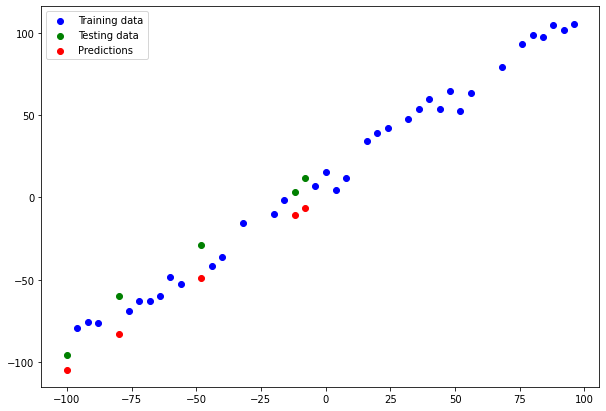

In [64]:
# Make and plot predictions for model_1
y_preds_1 = model.predict(X_test)
plot_predictions(predictions = y_preds_1)

In [68]:
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=16.769896>,
 <tf.Tensor: shape=(), dtype=float32, numpy=306.29105>)

In [77]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(128, activation = "relu", input_shape = (1, ), name = "hidden_layer"),
        tf.keras.layers.Dense(1, activation = None, name = "output_layer")
    ], name = 'model_2'
)

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2),
    metrics = ['mae']
)

# 3. Fit the model
model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 133ms/step - loss: 48.9170 - mae: 48.9170 - val_loss: 30.0751 - val_mae: 30.0751
Epoch 2/100
2/2 [==============================] - 0s 33ms/step - loss: 35.1800 - mae: 35.1800 - val_loss: 17.3734 - val_mae: 17.3734
Epoch 3/100
2/2 [==============================] - 0s 71ms/step - loss: 21.3764 - mae: 21.3764 - val_loss: 6.3092 - val_mae: 6.3092
Epoch 4/100
2/2 [==============================] - 0s 45ms/step - loss: 8.4734 - mae: 8.4734 - val_loss: 8.8267 - val_mae: 8.8267
Epoch 5/100
2/2 [==============================] - 0s 53ms/step - loss: 11.3824 - mae: 11.3824 - val_loss: 14.1676 - val_mae: 14.1676
Epoch 6/100
2/2 [==============================] - 0s 30ms/step - loss: 16.2367 - mae: 16.2367 - val_loss: 12.7001 - val_mae: 12.7001
Epoch 7/100
2/2 [==============================] - 0s 35ms/step - loss: 14.5700 - mae: 14.5700 - val_loss: 8.8944 - val_mae: 8.8944
Epoch 8/100
2/2 [==============================] - 0s 35ms/step - los

1/1 [==============================] - 0s 39ms/step


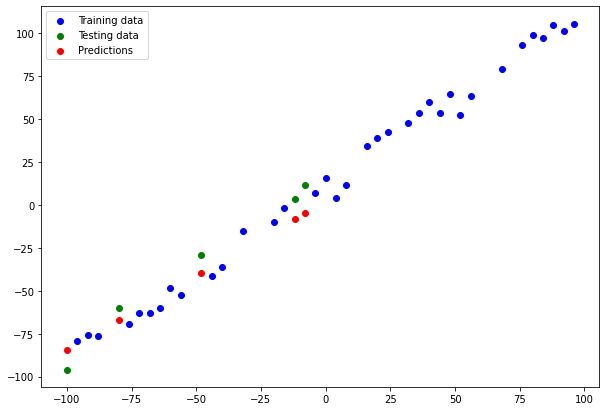

In [78]:
y_preds_2 = model.predict(X_test)
plot_predictions(predictions = y_preds_2)

In [79]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=11.347539>,
 <tf.Tensor: shape=(), dtype=float32, numpy=138.56165>)

There's a substantial reduction!

In [88]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(128, activation = "relu", input_shape = (1, ), name = "hidden_layer"),
        tf.keras.layers.Dense(1, activation = None, name = "output_layer")
    ], name = 'model_3'
)

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2),
    metrics = ['mae']
)

# 3. Fit the model
model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 500)

Epoch 1/500
2/2 [==============================] - 1s 176ms/step - loss: 48.9170 - mae: 48.9170 - val_loss: 30.0751 - val_mae: 30.0751
Epoch 2/500
2/2 [==============================] - 0s 62ms/step - loss: 35.1800 - mae: 35.1800 - val_loss: 17.3734 - val_mae: 17.3734
Epoch 3/500
2/2 [==============================] - 0s 94ms/step - loss: 21.3764 - mae: 21.3764 - val_loss: 6.3092 - val_mae: 6.3092
Epoch 4/500
2/2 [==============================] - 0s 68ms/step - loss: 8.4734 - mae: 8.4734 - val_loss: 8.8267 - val_mae: 8.8267
Epoch 5/500
2/2 [==============================] - 0s 68ms/step - loss: 11.3824 - mae: 11.3824 - val_loss: 14.1676 - val_mae: 14.1676
Epoch 6/500
2/2 [==============================] - 0s 62ms/step - loss: 16.2367 - mae: 16.2367 - val_loss: 12.7001 - val_mae: 12.7001
Epoch 7/500
2/2 [==============================] - 0s 70ms/step - loss: 14.5700 - mae: 14.5700 - val_loss: 8.8944 - val_mae: 8.8944
Epoch 8/500
2/2 [==============================] - 0s 56ms/step - los

1/1 [==============================] - 0s 51ms/step


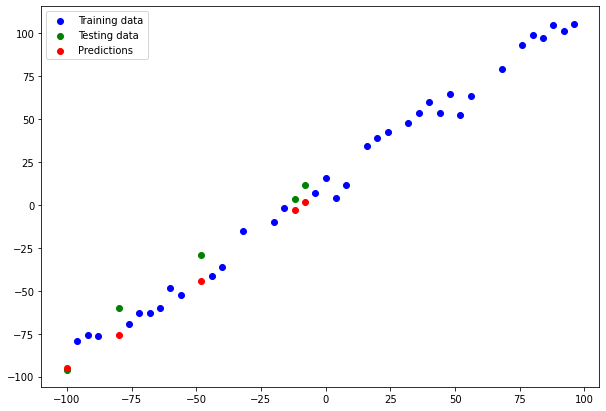

In [89]:
y_preds_3 = model.predict(X_test)
plot_predictions(predictions = y_preds_3)

In [90]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=9.50535>,
 <tf.Tensor: shape=(), dtype=float32, numpy=120.30011>)

This seems to be performing really well.

## Comparing the results of our experiments

We've run a few experiments, let's compare the results

In [83]:
# Lets compare our model's results using a pandas Dataframe
import pandas as pd

model_results = pd.DataFrame({"models":["model_1", "model_2", "model_3"], "Mean Absolute Error": [mae_1.numpy(), mae_2.numpy(), mae_3.numpy()], "Mean Square Error": [mse_1.numpy(), mse_2.numpy(), mse_3.numpy()]})
print(model_results)

    models  Mean Absolute Error  Mean Square Error
0  model_1             9.505350         120.300110
1  model_2            11.347539         138.561646
2  model_3             9.505350         120.300110


Model 3 seems to be performing the best.

>**Note:** One of our main goals is to minimize the time between our experiments. The more experiments we do, the more things we'll figure our which don't work and in turn get closer to figuring out what does work. Remember the machine learning practitioner's motto: "Experiment, experiment, experiment"

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments

And when doing so, it can be tedious if you're running lots of experiments.

Luckily there are tools to help us!


**Resource:** As you build more models, you'll want to look into using:
* Tensorboard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later)
* Weights and Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard)

In [ ]:
# 1. Create a model (specified to your problems)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = "relu", input_shape = (1, ), name = "hidden_layer_1"),
    tf.keras.layers.Dense(256, activation = "relu", name = "hidden_layer_2"),
    tf.keras.layers.Dense(64, activation = "relu", name = "hidden_layer_3"),
    tf.keras.layers.Dense(1, activation = None, name = "output_layer")
], name ="model_best")

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics = ["mae"]
)

# 3. Fit the model
model.fit(X_train,y_train, validation_data = (X_val, y_val),epochs = 100)

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app

In TensorFlow there are 2 formats:

* SavedModel format: Restored using tf.keras.models.load_model; Compatible with TensorFlow Serving; Structure: a) `assets` directory b) `variables` directory c) `saved_model.pb` (Proteau by file)
* HDF5 format: Hierarchical Data Format; Designed to store and organise large amounts of data

In [91]:
# Save model using the SavedModel format
model.save("Models/Neural_Network_Regression_with_Tensorflow/Best_Model/best_model_savedmodel_format")

INFO:tensorflow:Assets written to: Models/Neural_Network_Regression_with_Tensorflow/Best_Model/best_model_savedmodel_format\assets


In [92]:
# Save model in the HDF5 format
model.save("Models/Neural_Network_Regression_with_Tensorflow/Best_Model/best_model_HDF5_format.h5")

## Loading in a Saved Model

In [93]:
# Load in the SavedModel format model

loaded_SavedModel_format = tf.keras.models.load_model("Models/Neural_Network_Regression_with_Tensorflow/Best_Model/best_model_savedmodel_format")
loaded_SavedModel_format.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 128)               256       
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


In [94]:
y_preds_loaded = loaded_SavedModel_format.predict(X_test)
mae(y_test, y_preds_loaded), mse(y_test, y_preds_loaded)

1/1 [==============================] - 0s 57ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=9.50535>,
 <tf.Tensor: shape=(), dtype=float32, numpy=120.30011>)

In [95]:
loaded_h5_model = tf.keras.models.load_model("Models/Neural_Network_Regression_with_Tensorflow/Best_Model/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 128)               256       
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


In [96]:
y_preds_loaded = loaded_h5_model.predict(X_test)
mae(y_test, y_preds_loaded), mse(y_test, y_preds_loaded)

1/1 [==============================] - 0s 36ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=9.50535>,
 <tf.Tensor: shape=(), dtype=float32, numpy=120.30011>)

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click download
2. Use code (see the cell below)
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below)

In [ ]:
# Download a file from Google Colab
# from google.colab import files

# files.download("/content/best_model_HDF5_format.h5")

In [1]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
# !cp /content/drive/best_model_HDF5_format.h5 /content/drive/MyDrive/tensorflow_course/Models
# !ls /content/drive/MyDrive/tensorflow_course/Models

## A Larger Example

In [14]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import numpy as np

%matplotlib inline

In [3]:
# Read in the insurance dataset
insurance_df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
X, y = insurance_df.iloc[:, :-1], insurance_df.iloc[:, -1]

### Option 1: Use sklearn for Data Preparation

In [7]:
categorical_columns = ["sex", "smoker", "region"]
numerical_columns = ["age","bmi", "children"]

num_pipeline = Pipeline(
    [
        ('std_scaling_layer', StandardScaler())
    ]
)

cat_pipeline = Pipeline(
    [
        ('one_hot_encoding', OneHotEncoder())
    ]
)

In [10]:
full_pipeline = ColumnTransformer(
    [
        ('num_transform_layer', num_pipeline, numerical_columns),
        ('cat_transform_layer', cat_pipeline, categorical_columns)
    ]
)

X_prepared = full_pipeline.fit_transform(X)

(1338, 11)

### Option 2: Use Pandas for data preparation

In [12]:
insurance_one_hot = pd.get_dummies(insurance_df)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


And we can proceed from here. However, I prefer the first method since its much more succinct and does a better job of preparing the data.

### Create the Train, Validation and Test Set

In [22]:
random_permutation = np.random.permutation(X_prepared.shape[0])

train_set_idx, val_set_idx, test_set_idx = random_permutation[int(0.3*len(random_permutation)):], random_permutation[len(random_permutation)//10:int(0.3*len(random_permutation))], random_permutation[:len(random_permutation)//10]
X_train_prepared, X_val_prepared, X_test_prepared = tf.convert_to_tensor(X_prepared[train_set_idx]), tf.convert_to_tensor(X_prepared[val_set_idx]), tf.convert_to_tensor(X_prepared[test_set_idx])
y_train, y_val, y_test = tf.convert_to_tensor(y[train_set_idx]), tf.convert_to_tensor(y[val_set_idx]), tf.convert_to_tensor(y[test_set_idx])

Alternatively we can use `train_test_split` from `sklearn.model_selection`

### Create and Fit A Model

In [25]:
# 1. Create a model
model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(64, input_shape = (11,), activation = "relu", name = "hidden_layer_1"),
        tf.keras.layers.Dense(1, activation = None, name = "output_layer")
    ], name = "model_2"
)

# 2. Compile the model
model_1.compile(
    loss = tf.keras.losses.MSE,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-2),
    metrics = ["mae"]
)

# 3. Fit the model
model_1.fit(X_train_prepared, y_train, validation_data = (X_val_prepared, y_val), epochs = 100)

Epoch 1/100
30/30 [==============================] - 1s 14ms/step - loss: 315311232.0000 - mae: 13061.9658 - val_loss: 330626912.0000 - val_mae: 13440.3438
Epoch 2/100
30/30 [==============================] - 0s 5ms/step - loss: 314284352.0000 - mae: 13024.5566 - val_loss: 328789120.0000 - val_mae: 13376.6982
Epoch 3/100
30/30 [==============================] - 0s 5ms/step - loss: 311747296.0000 - mae: 12932.1885 - val_loss: 325141088.0000 - val_mae: 13249.3721
Epoch 4/100
30/30 [==============================] - 0s 5ms/step - loss: 307366848.0000 - mae: 12775.6582 - val_loss: 319586656.0000 - val_mae: 13052.4492
Epoch 5/100
30/30 [==============================] - 0s 5ms/step - loss: 301053792.0000 - mae: 12543.0186 - val_loss: 311991232.0000 - val_mae: 12780.1914
Epoch 6/100
30/30 [==============================] - 0s 5ms/step - loss: 292924544.0000 - mae: 12241.3613 - val_loss: 302667296.0000 - val_mae: 12437.1689
Epoch 7/100
30/30 [==============================] - 0s 5ms/step - lo

In [26]:
model_1.evaluate(X_test_prepared, y_test)

5/5 [==============================] - 0s 10ms/step - loss: 41103312.0000 - mae: 4410.6392


[41103312.0, 4410.63916015625]

In [30]:
tf.reduce_mean(y_train)

<tf.Tensor: shape=(), dtype=float64, numpy=13068.823416060834>

Looks like our model is doing just okay. Lets try to improve it.

In [33]:
# 1. Create a model
model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(64, input_shape = (11,), activation = "relu", name = "hidden_layer_1"),
        tf.keras.layers.Dense(128, activation = "relu", name = "hidden_layer_2"),
        tf.keras.layers.Dense(256, activation = "relu", name = "hidden_layer_3"),
        tf.keras.layers.Dense(32, activation = "relu", name = "hidden_layer_4"),
        tf.keras.layers.Dense(1, activation = None, name = "output_layer")
    ], name = "model_1"
)

# 2. Compile the model
model_2.compile(
    loss = tf.keras.losses.MSE,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
    metrics = ["mae"]
)

# 3. Fit the model
model_2.fit(X_train_prepared, y_train, validation_data = (X_val_prepared, y_val), epochs = 500)

Epoch 1/500
30/30 [==============================] - 1s 14ms/step - loss: 315342112.0000 - mae: 13062.5098 - val_loss: 330380512.0000 - val_mae: 13429.4492
Epoch 2/500
30/30 [==============================] - 0s 6ms/step - loss: 310404480.0000 - mae: 12858.5381 - val_loss: 313046528.0000 - val_mae: 12760.3320
Epoch 3/500
30/30 [==============================] - 0s 7ms/step - loss: 255993360.0000 - mae: 10839.3809 - val_loss: 198191680.0000 - val_mae: 8745.0615
Epoch 4/500
30/30 [==============================] - 0s 6ms/step - loss: 148675712.0000 - mae: 8985.1016 - val_loss: 128068824.0000 - val_mae: 9071.2471
Epoch 5/500
30/30 [==============================] - 0s 6ms/step - loss: 114206528.0000 - mae: 8287.6777 - val_loss: 108333656.0000 - val_mae: 8155.9087
Epoch 6/500
30/30 [==============================] - 0s 6ms/step - loss: 96684632.0000 - mae: 8018.4150 - val_loss: 90605808.0000 - val_mae: 7611.3218
Epoch 7/500
30/30 [==============================] - 0s 6ms/step - loss: 80124

In [34]:
model_2.evaluate(X_test_prepared, y_test)

5/5 [==============================] - 0s 11ms/step - loss: 34223200.0000 - mae: 3596.5256


[34223200.0, 3596.525634765625]

So looks like we've started overfitting! Maybe we need to reduce model complexity. Lets try stripping off a layer and reducing the number of neurons in the layers

In [39]:
# 1. Create a model
model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(64, input_shape = (11,), activation = "relu", name = "hidden_layer_1"),
        tf.keras.layers.Dense(64, activation = "relu", name = "hidden_layer_2"),
        tf.keras.layers.Dense(32, activation = "relu", name = "hidden_layer_3"),
        tf.keras.layers.Dense(1, activation = None, name = "output_layer")
    ], name = "model_3"
)

# 2. Compile the model
model_3.compile(
    loss = tf.keras.losses.MSE,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
    metrics = ["mae"]
)

# 3. Fit the model
history = model_3.fit(X_train_prepared, y_train, validation_data = (X_val_prepared, y_val), epochs = 200)

Epoch 1/200
30/30 [==============================] - 1s 15ms/step - loss: 315476288.0000 - mae: 13067.7422 - val_loss: 331092128.0000 - val_mae: 13456.7412
Epoch 2/200
30/30 [==============================] - 0s 12ms/step - loss: 315264224.0000 - mae: 13059.7920 - val_loss: 330594016.0000 - val_mae: 13438.6025
Epoch 3/200
30/30 [==============================] - 0s 9ms/step - loss: 314102016.0000 - mae: 13015.9639 - val_loss: 328090400.0000 - val_mae: 13348.7393
Epoch 4/200
30/30 [==============================] - 0s 8ms/step - loss: 309398912.0000 - mae: 12840.2686 - val_loss: 319452288.0000 - val_mae: 13037.9355
Epoch 5/200
30/30 [==============================] - 0s 9ms/step - loss: 295732672.0000 - mae: 12324.1494 - val_loss: 297690304.0000 - val_mae: 12228.0410
Epoch 6/200
30/30 [==============================] - 0s 8ms/step - loss: 266265296.0000 - mae: 11173.4795 - val_loss: 256402880.0000 - val_mae: 10631.1465
Epoch 7/200
30/30 [==============================] - 0s 8ms/step - l

In [40]:
model_3.evaluate(X_test_prepared, y_test)

5/5 [==============================] - 0s 7ms/step - loss: 26560570.0000 - mae: 3130.6587


[26560570.0, 3130.65869140625]

Yupp this looks much better. The MAE over test data looks similar to train and validation data.

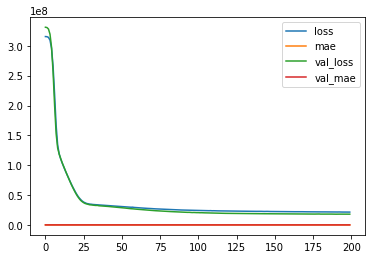

In [41]:
pd.DataFrame(history.history).plot()
plt.ylabel = "Loss"
plt.xlabel = "Epochs"

> **Question:** How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! Its called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) which is a TensorFlow component you can add to your model to stop training once its loss stops improving a certain metric.

## Preprocessing Data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure, try both

|Scaling type|What it does|Scikit-learn Function|When to use|
|------------|------------|---------------------|-----------|
|Scale (also referred to as normalization)|Converts all values to between 0 and 1 whilst preserving the original distribution|MinMaxScaler|Use as default scaler with neural networks|
|Standardization|Removes the mean and divides each value by the standard deviation|StandardScaler|Transform a feature to have close to normal distribution (caution: reduces effect of outliers)|

In [42]:
from sklearn.preprocessing import MinMaxScaler
num_pipeline = Pipeline(
    [
        ('std_scaling_layer', MinMaxScaler())
    ]
)

cat_pipeline = Pipeline(
    [
        ('one_hot_encoding', OneHotEncoder(handle_unknown="ignore"))
    ]
)

In [44]:
full_pipeline = ColumnTransformer(
    [
        ('num_transform_layer', num_pipeline, numerical_columns),
        ('cat_transform_layer', cat_pipeline, categorical_columns)
    ]
)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train_normal = full_pipeline.fit_transform(X_train)
X_test_normal = full_pipeline.transform(X_test)

Beautiful! Our data has been normalized and one hot encoded. Now lets build a neural network model on it and see how it goes.

In [46]:
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(64, input_shape = (11,), activation = "relu", name = "hidden_layer_1"),
        tf.keras.layers.Dense(64, activation = "relu", name = "hidden_layer_2"),
        tf.keras.layers.Dense(32, activation = "relu", name = "hidden_layer_3"),
        tf.keras.layers.Dense(1, activation = None, name = "output_layer")
    ], name = "model_3"
)

# 2. Compile the model
model_3.compile(
    loss = tf.keras.losses.MSE,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
    metrics = ["mae"]
)

# 3. Fit the model
history = model_3.fit(X_train_normal, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 12ms/step - loss: 322407808.0000 - mae: 13344.4971
Epoch 2/100
34/34 [==============================] - 0s 8ms/step - loss: 322007840.0000 - mae: 13329.8242
Epoch 3/100
34/34 [==============================] - 0s 8ms/step - loss: 319568992.0000 - mae: 13241.5254
Epoch 4/100
34/34 [==============================] - 0s 8ms/step - loss: 310328000.0000 - mae: 12895.2773
Epoch 5/100
34/34 [==============================] - 0s 8ms/step - loss: 286156928.0000 - mae: 11960.0176
Epoch 6/100
34/34 [==============================] - 0s 7ms/step - loss: 241570240.0000 - mae: 10272.9268
Epoch 7/100
34/34 [==============================] - 0s 8ms/step - loss: 186038064.0000 - mae: 8507.1807
Epoch 8/100
34/34 [==============================] - 0s 10ms/step - loss: 144599296.0000 - mae: 8006.8550
Epoch 9/100
34/34 [==============================] - 0s 8ms/step - loss: 129114648.0000 - mae: 8450.7891
Epoch 10/100
34/34 [===========================

In [47]:
model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 11ms/step - loss: 31169486.0000 - mae: 3855.4866


[31169486.0, 3855.486572265625]

Beautiful! We've reduced overfitting by a lot! Although we've sacrificed some accuracy in the process. However, we could in theory get more data and expect better results from this model.